# Estimating the Difference Between the Means of Successful Outcomes and Failures

Group member: Eun Ji Hwang, Daniel Dai, Camilla Ren, Rachel Yang

## Table of content

### Index: 
1.[Introduction](#Introduction)  
2.[Preliminary Results](#Preliminary-Results)   
3.[Methods](#Methods)   
4.[Reference](#Reference)


## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Introduction

### Background:
Marketing sales campaigns are a typical strategy used by companies to grow their business. In particular, telemarketing conducted remotely has enabled marketing to optimize customer lifetime value by evaluating available information and metrics, hence allowing the company to build longer and tighter relationships in alignment with business demand.

<img src="https://th.bing.com/th/id/R.8c8656b19cf1e229b4d8154de1b2f8b6?rik=BWfEliq15MzvBQ&riu=http%3a%2f%2fwww.pollenmidwest.org%2fwp-content%2fuploads%2f2017%2f04%2fbanking2.gif&ehk=CRhvAOpg%2bzexGRo8tdAQsWMixVUj8xnxdDQxQx%2bU%2fmM%3d&risl=&pid=ImgRaw&r=0" width=700>


### Our Dataset:
The selected data refer to telemarketing campaigns of a Portuguese banking institution, where the campaigns were based on phone calls. Each record contains information about a bank customer (e.g., age), information about the last contact of the current campaign (e.g., contact duration), other attributes (e.g., three-month Euribor), and the contact outcome ("success" or "failure"). 


### Our Question:
Previous study has shown that the duration of previous calls were the one of the most relevant attributes that determine the contact outcome. The duration of previous contact refers to the call duration that needed to be rescheduled to obtain a final answer by the client. Values of call duration were recorded in the column named “duration” in the choses dataset. 


Therefore, in this analysis, we are interested in the difference in means between the call duration for successful outcomes and failures. The standard deviation of the difference is calculated to indicate the shape of the distribution of the mean difference.

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30>Preliminary Results

In [23]:
# Load package
library(tidyverse)
library(tidyr)
library(digest)
library(GGally)
library(repr)
library(infer)
library(cowplot)
library(gridExtra)
library(datateachr)
install.packages("expss")
library(expss)
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [24]:
bank_link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJVzL4kjpn0J7YFzjTzCLlUKs0gtGThScWLRnezYxMjR5vE5PvwpHKrxJbKQjQ4AVp7QvS-a06yRFZ/pub?output=csv"
bank_data <- read_delim(bank_link, skip=1, delim = ";" , col_names = FALSE)%>%
                rename(age = X1,job = X2, marital = X3, education = X4,  default = X5, housing = X6, loan = X7, contact = X8, 
                                  month = X9, day_of_week = X10, duration = X11, campaign  =X12, pdays = X13, previous = X14, poutcome = X15, 
                                  emp_var_rate = X16, cons_price_idx = X17, cons_conf_idx = X18, euribor_3m = X19, nr_employed = X20,
                                  y = X21)

Rows: 4119 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (11): X2, X3, X4, X5, X6, X7, X8, X9, X10, X15, X21
dbl (10): X1, X11, X12, X13, X14, X16, X17, X18, X19, X20

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



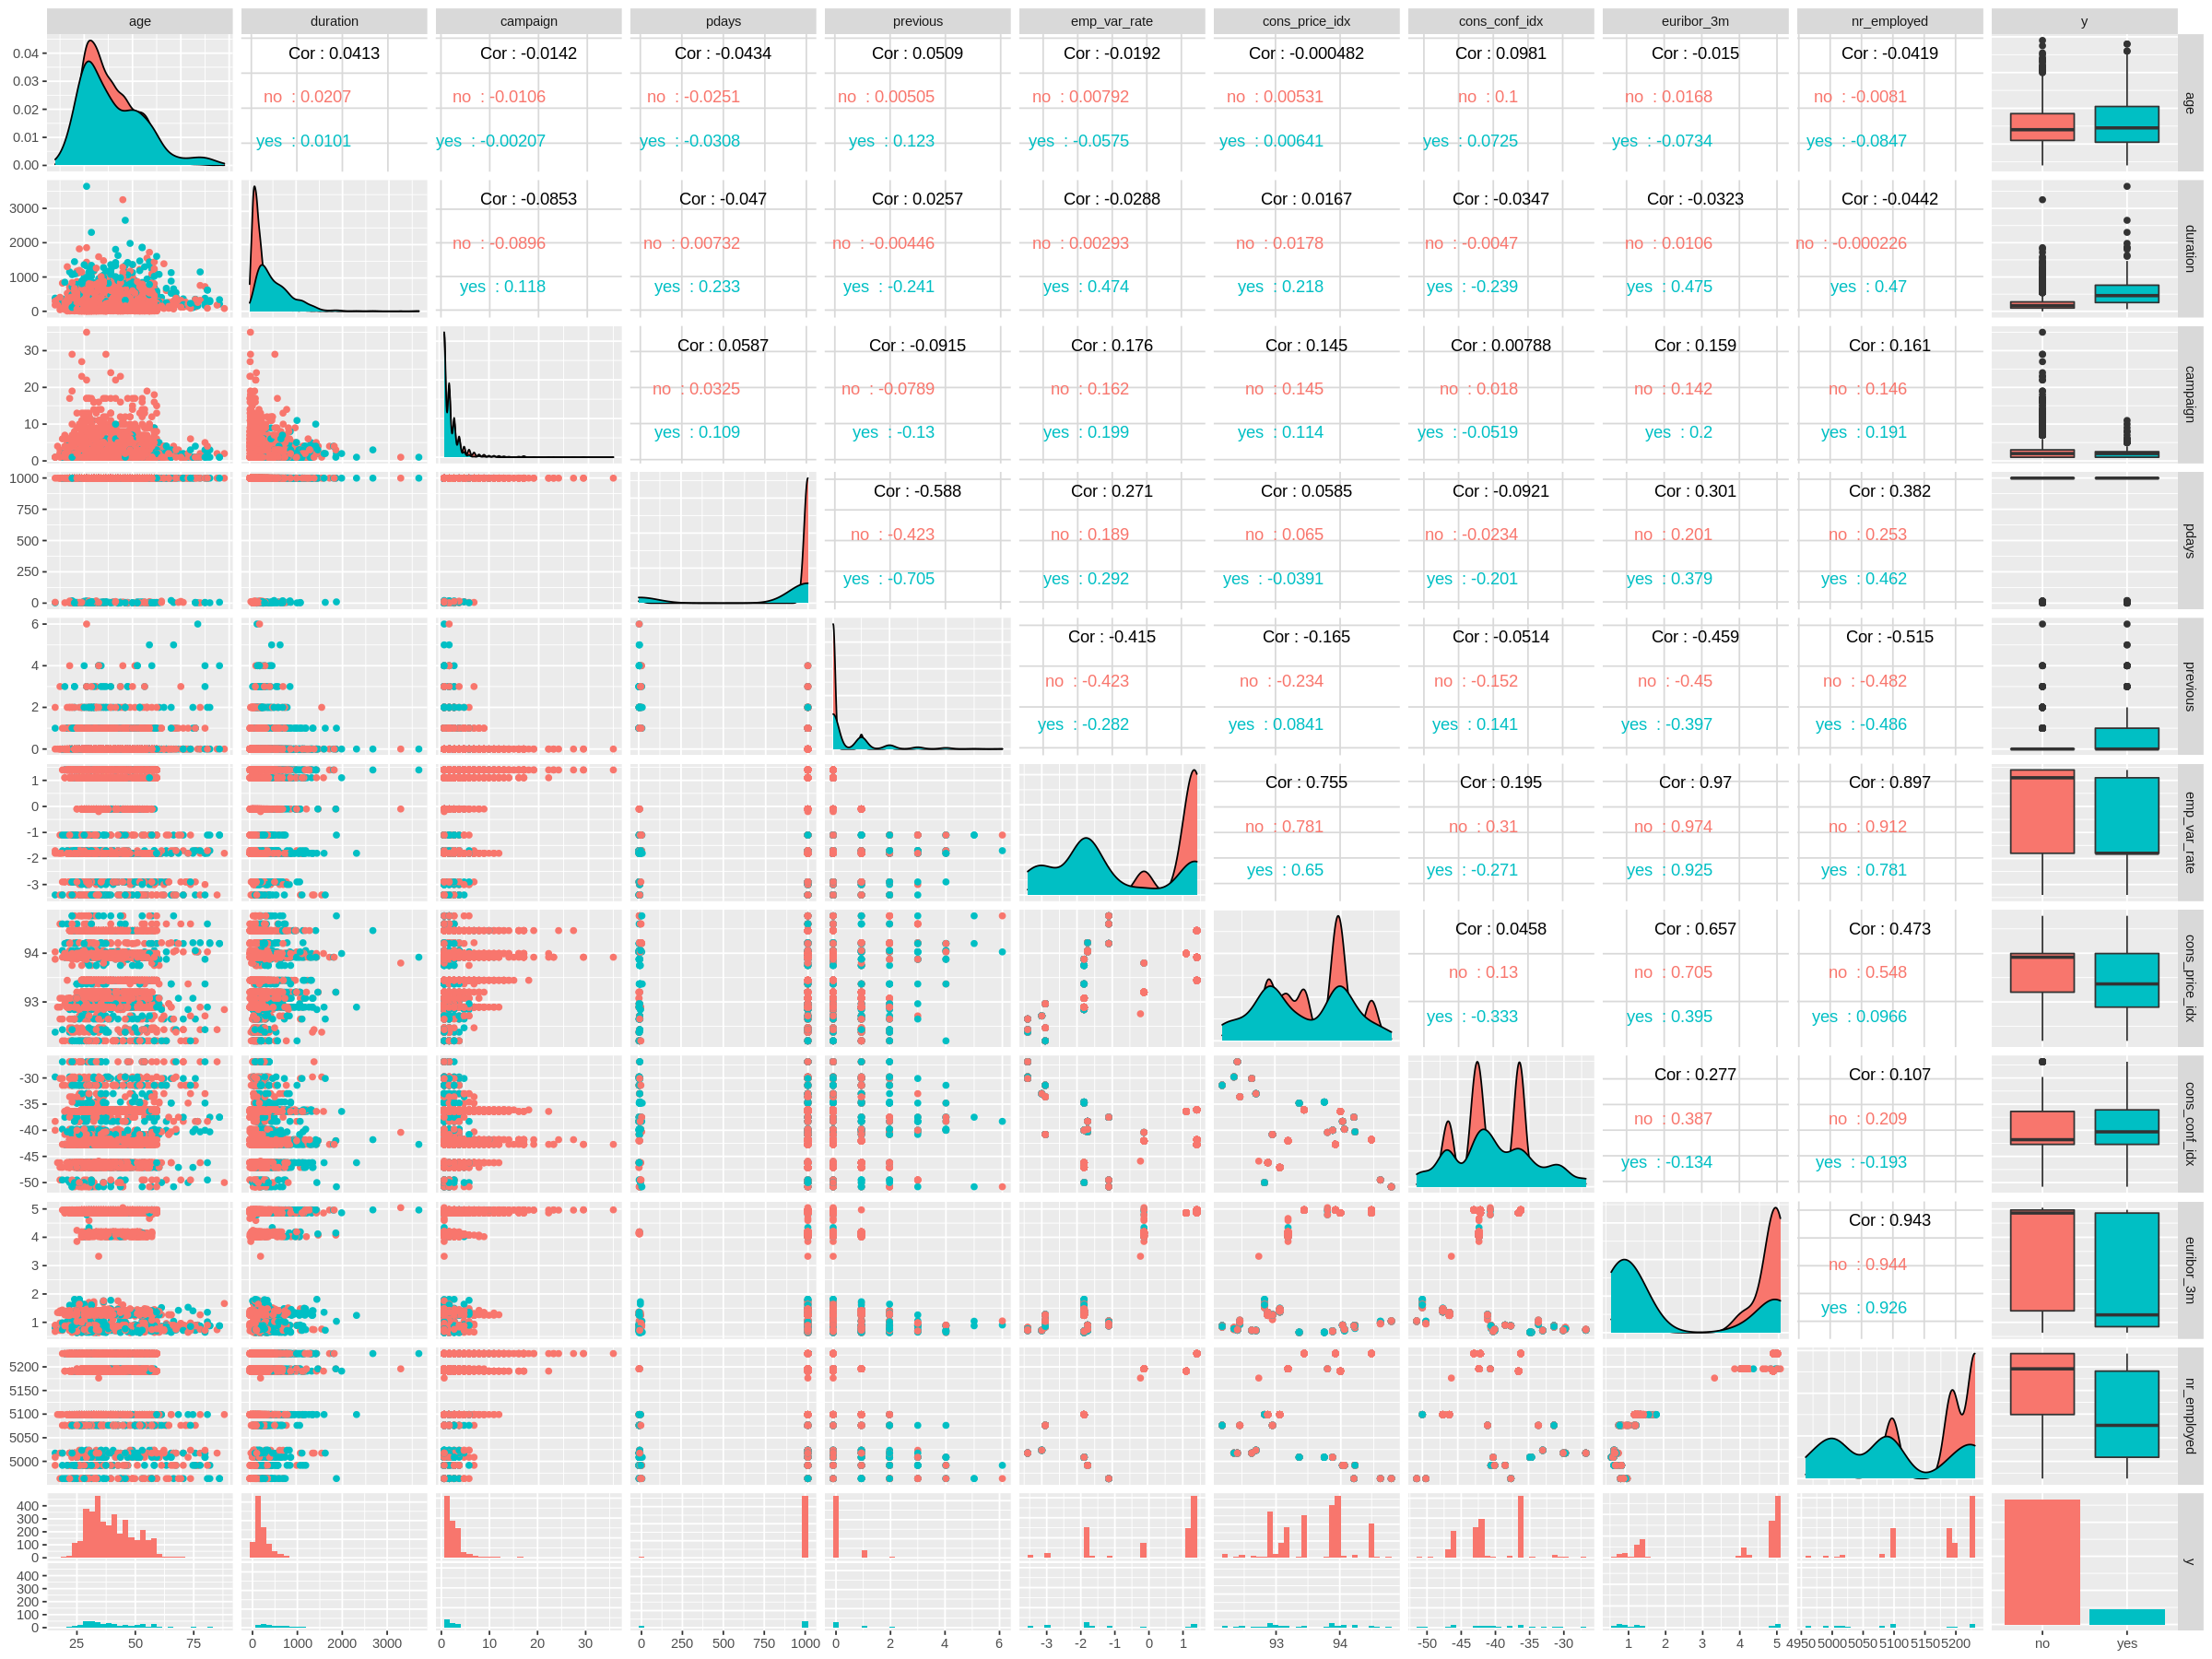

In [25]:
options(repr.plot.width = 20, repr.plot.height = 15)
bank_data_compare <- bank_data%>%
            select(age, duration, campaign, pdays, previous, emp_var_rate, cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y)%>%
            ggpairs(aes(color = y))

bank_data_compare

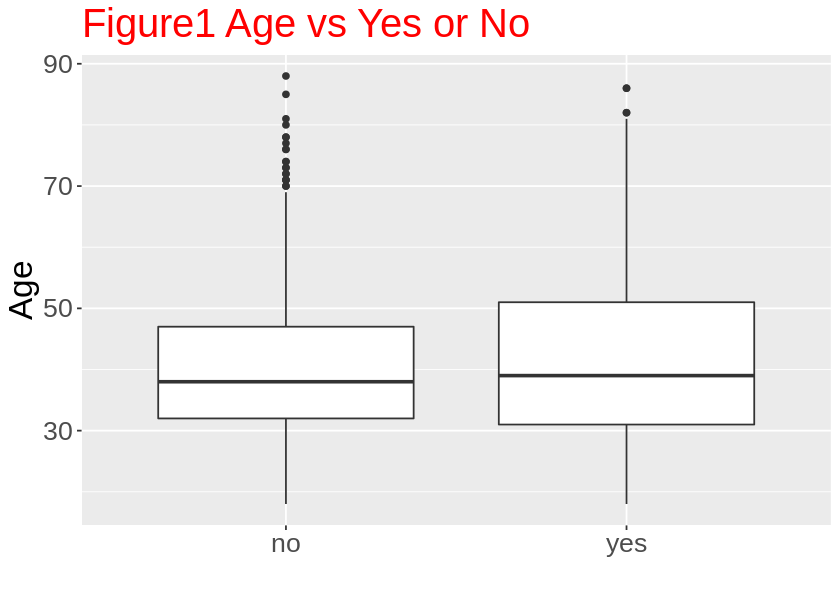

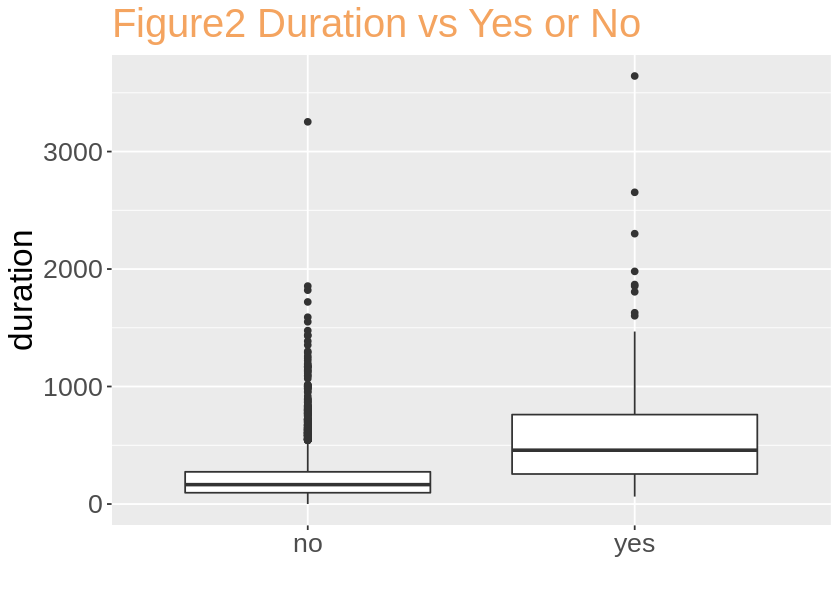

Warning message:
“Removed 160 rows containing non-finite values (stat_boxplot).”


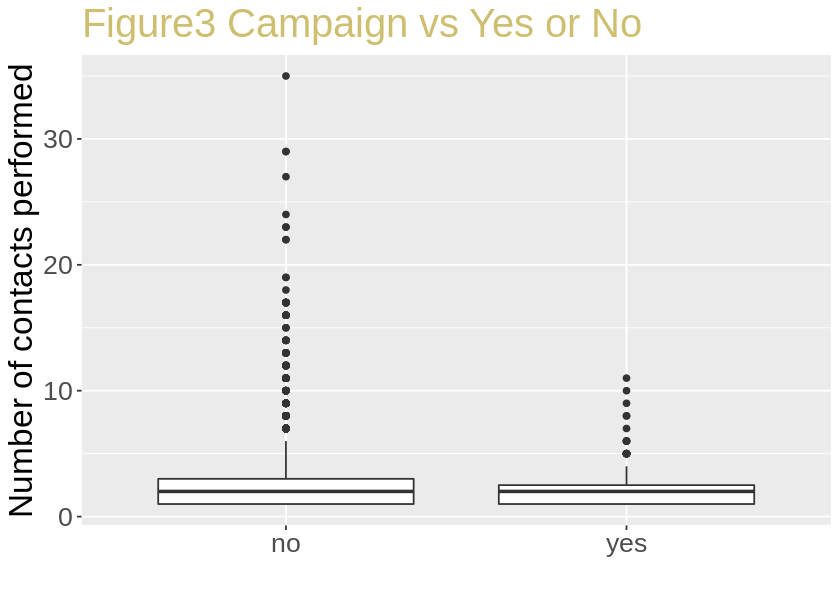

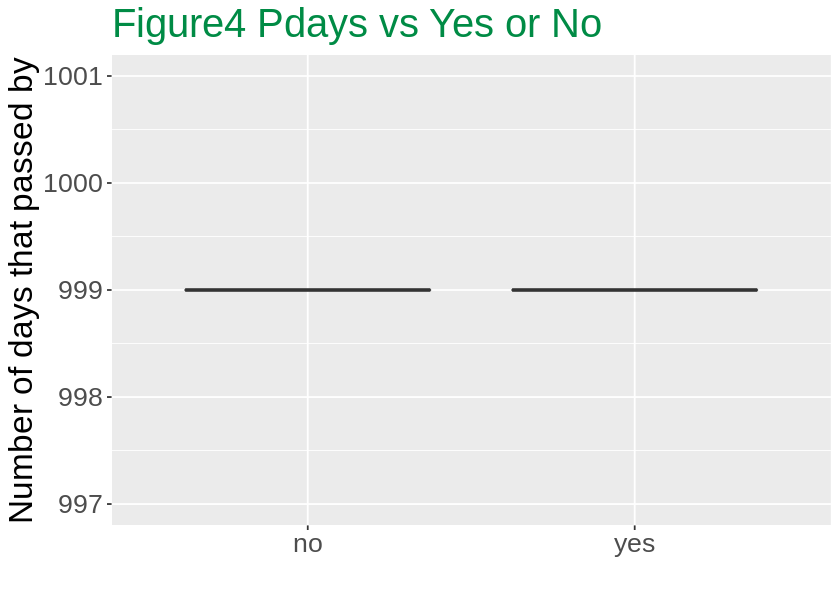

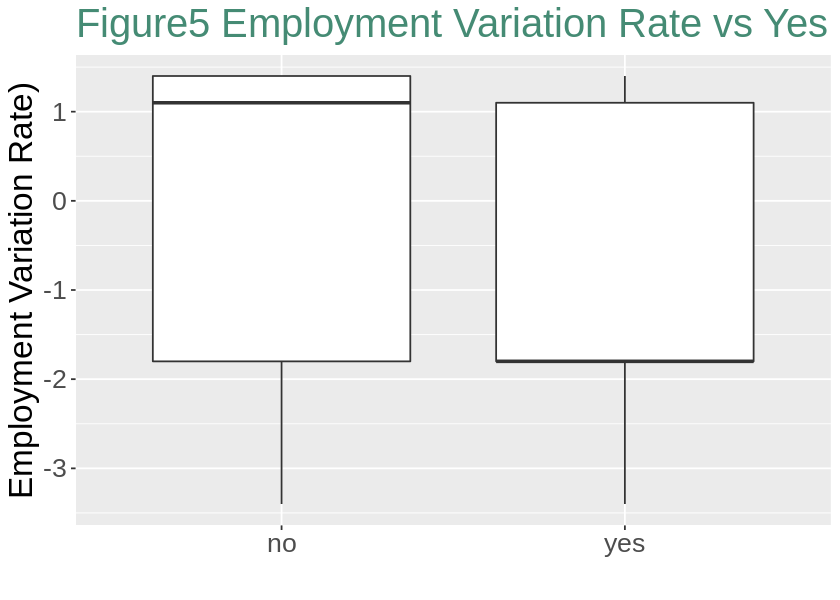

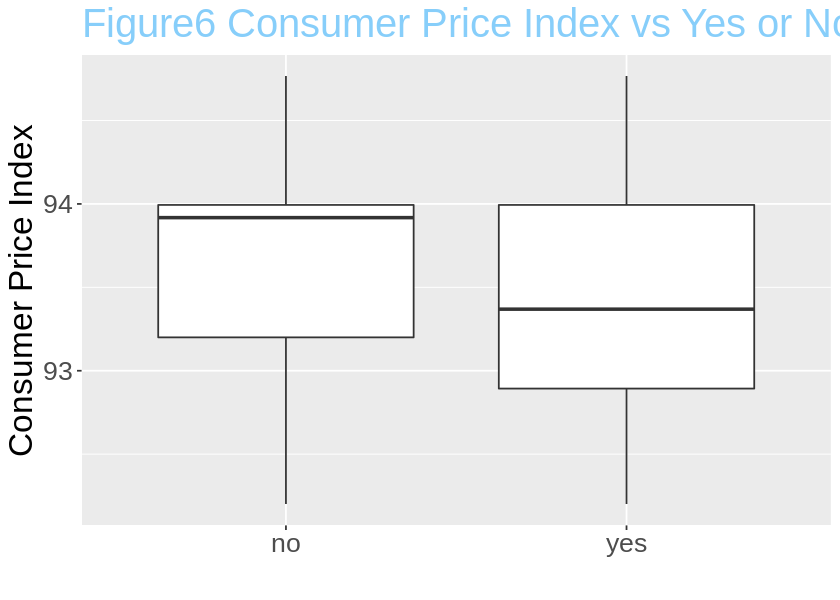

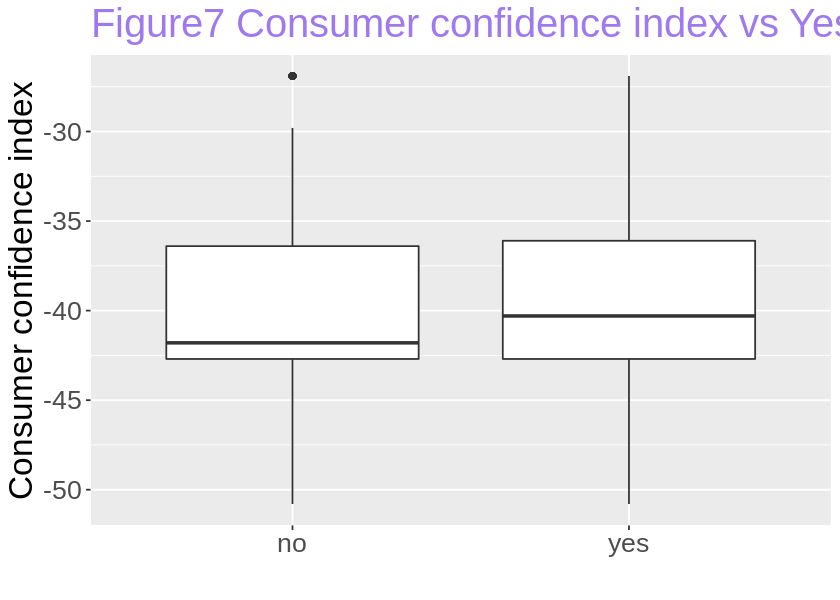

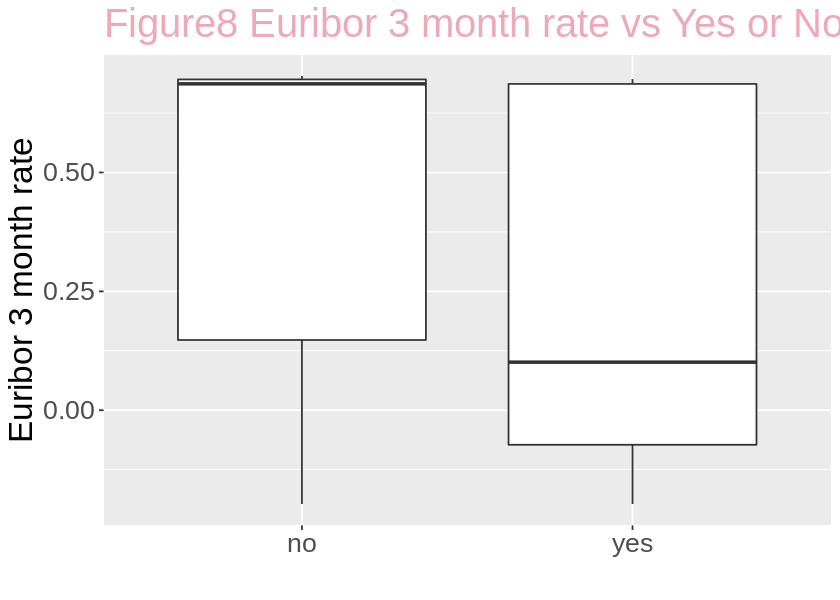

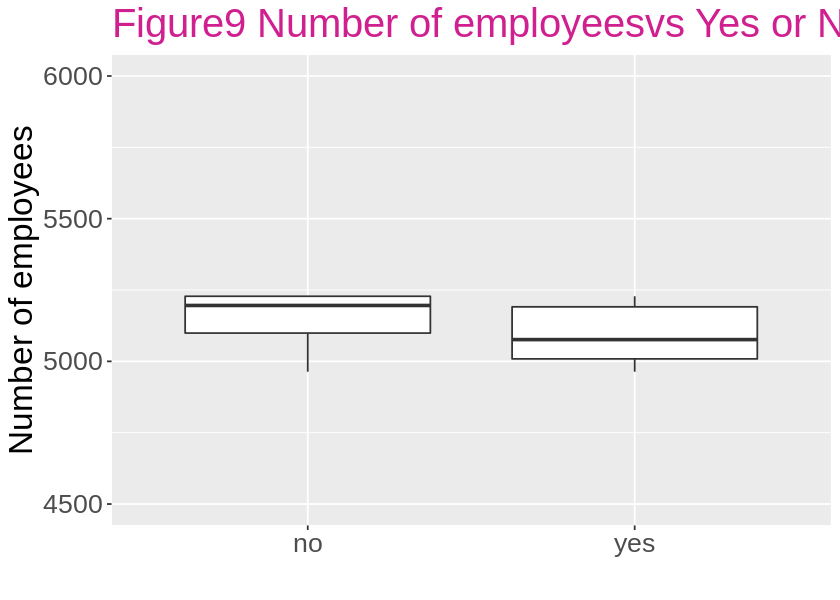

In [27]:
options(repr.plot.width = 7, repr.plot.height = 5)
bank_data_mutated<- mutate(bank_data,euribor_3m= log10(as.numeric(euribor_3m)))

age_diag_plot <- ggplot(bank_data,aes(y=age,x=y)) +
    geom_boxplot()+
    labs(x="", y="Age") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure1 Age vs Yes or No")+
    theme(plot.title = element_text(color = "red1"))
age_diag_plot

duration_diag_plot <- ggplot(bank_data,aes(y=duration,x=y)) +
    geom_boxplot()+
    labs(x="", y="duration") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure2 Duration vs Yes or No")+
    theme(plot.title = element_text(color = "sandybrown"))
duration_diag_plot

campaign_diag_plot <- ggplot(bank_data,aes(y=campaign,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of contacts performed") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure3 Campaign vs Yes or No")+
    theme(plot.title = element_text(color = "lightgoldenrod3"))
campaign_diag_plot

pdays_diag_plot <- ggplot(bank_data,aes(y=pdays,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of days that passed by") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure4 Pdays vs Yes or No")+
    theme(plot.title = element_text(color = "springgreen4"))+
    ylim(997,1001)
pdays_diag_plot


emp_var_rate_diag_plot <- ggplot(bank_data,aes(y=emp_var_rate,x=y)) +
    geom_boxplot()+
    labs(x="", y="Employment Variation Rate)") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure5 Employment Variation Rate vs Yes or No")+
    theme(plot.title = element_text(color = "aquamarine4"))
emp_var_rate_diag_plot

cons_price_idx_diag_plot <- ggplot(bank_data,aes(y=cons_price_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer Price Index") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure6 Consumer Price Index vs Yes or No")+
    theme(plot.title = element_text(color = "lightskyblue"))
cons_price_idx_diag_plot

cons_conf_idx_diag_plot <- ggplot(bank_data,aes(y=cons_conf_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer confidence index") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure7 Consumer confidence index vs Yes or No")+
    theme(plot.title = element_text(color = "mediumpurple2"))
cons_conf_idx_diag_plot

euribor_3m_diag_plot <- ggplot(bank_data_mutated,aes(y=euribor_3m,x=y)) +
    geom_boxplot()+
    labs(x="", y="Euribor 3 month rate") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure8 Euribor 3 month rate vs Yes or No")+
    theme(plot.title = element_text(color = "pink2"))
euribor_3m_diag_plot

nr_employed_diag_plot <- ggplot(bank_data,aes(y=nr_employed,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of employees") +
    theme(text=element_text(size=20)) +                    
    labs(title = "Figure9 Number of employeesvs Yes or No")+
    theme(plot.title = element_text(color = "violetred"))+
    ylim(4500,6000)
nr_employed_diag_plot


In [28]:
#select the data that we need
bank_data_sample <- bank_data %>%
                select(y, duration)


bank_data_summary <- bank_data_sample %>%
                    mutate(y = as.factor(y))%>%
                    summary()
bank_data_summary

       y           duration     
   no   :3668   Min.   :   0.0  
   yes  : 451   1st Qu.: 103.0  
                Median : 181.0  
                Mean   : 256.8  
                3rd Qu.: 317.0  
                Max.   :3643.0  

In [29]:
# Compute sample means and standard deviations
sample_estimates<- bank_data_sample %>%
                group_by(y) %>%
                summarize(mean = mean(duration),sd = sd(duration))
sample_estimates


number_rows <- bank_data_sample %>%
            nrow()

# Compute sample means and standard deviations
sample_estimates<- bank_data_sample %>%
                group_by(y) %>%
                summarize(mean = mean(duration),sd = sd(duration))

# Compute sample means
sample_means <- bank_data_sample %>%
                group_by(y) %>%
                summarize(mean = mean(duration))
sample_means

# Compute difference in sample means between call duration of a successful outcome and a failure
sample_means_diff <- sample_means%>%
                    pivot_wider(names_from = y, values_from = mean)%>%
                    transmute(diff = yes - no)%>%
                    pull()

number_rows <- bank_data_sample %>%
            nrow()

sample_means_diff


y,mean,sd
<chr>,<dbl>,<dbl>
no,219.4098,198.2563
yes,560.7871,411.5377


y,mean
<chr>,<dbl>
no,219.4098
yes,560.7871


ERROR: [1m[33mError[39m in [1m[1m`transmute()`:[22m
[1m[22m[33m![39m Problem while computing `diff = yes - no`.
[1mCaused by error in [1m[1m`mask$eval_all_mutate()`:[22m
[33m![39m object 'yes' not found


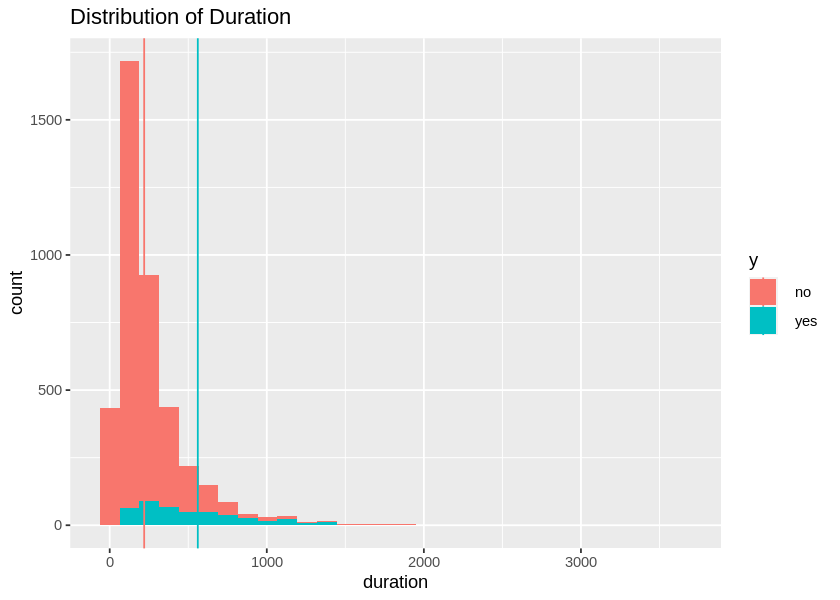

In [30]:
# Sample distribution
sample_distribution <- bank_data_sample %>% 
                    ggplot(aes(x = duration, fill = y)) +
                    geom_histogram(bins = 30)+
                    ggtitle("Distribution of Duration")+
                    geom_vline(data = sample_estimates, aes(xintercept = mean, color = y))

sample_distribution 

In [31]:
# Bootstrap distribution
# Perform the resampling with replacement of n size of from original sample
resample_yes <- bank_data_sample %>%
            filter(y == "yes")%>%
            rep_sample_n(size = number_rows, reps = 500, replace = TRUE)


# Compute sample mean
resample_mean_yes <- resample_yes %>%
                 group_by(replicate)%>%
                 summarize(mean_yes = mean(duration))


# Perform the resampling with replacement of n size of from original sample
resample_no <- bank_data_sample %>%
            filter(y == "no")%>%
            rep_sample_n(size = number_rows, reps = 500, replace = TRUE)



# Compute sample mean
resample_mean_no <- resample_no %>%
                 group_by(replicate)%>%
                 summarize(mean_no = mean(duration))



ERROR: Error in sample.int(n, size, replace = replace, prob = prob): invalid first argument


In [32]:
# Visualize the variation using a histogram
bootstrap_distribution_yes <- resample_mean_yes%>%
                            ggplot(aes(x = mean_yes))+
                            geom_histogram(bins = 30)+
                            ggtitle("Bootstrap Sample Distribution of Duration of Successful outcomes") +
                            xlab("Duration Bootstrap Mean(s)")

bootstrap_distribution_yes 

bootstrap_distribution_no <- resample_mean_no%>%
                            ggplot(aes(x = mean_no))+
                            geom_histogram(bins = 30)+
                            ggtitle("Bootstrap Sample Distribution of Duration of Failure Outcome") +
                            xlab("Duration Bootstrap Mean(s)")

bootstrap_distribution_no 

ERROR: Error in ggplot(., aes(x = mean_yes)): object 'resample_mean_yes' not found


In [ ]:

options(repr.plot.width = 29, repr.plot.height = 10)

age_diag_plot <- ggplot(heart_train,aes(y=age,x=diagnosis)) +
    geom_boxplot()+
    labs(x="Heart Diagnosis", y="Age (Year)") +
    theme(text=element_text(size=20))+      
    labs(title = "Figure1.2 age vs diagnosis ")+
    theme(plot.title = element_text(color = "chocolate3"))

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Methods

The good thing about this report is the fact that we were able to obtain a good enough dataset for our purpose. We plan to use both bootstrapping and asymptotics to generate 
Hypothesis testing: 
We want to compare the mean of call duration of successful and failure outcomes. This will give insights on whether call duration should be considered for employee training. 
In order to achieve our goal, we want to test the null hypothesis H0 against alternative hypothesis H1.
H0: There is no difference in mean duration between a successful session and a failed session. H1: There is a significant difference in mean duration between a successful session and a failed session. 
We plan to use a 95% confidence interval for our hypothesis testing. 


## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Reference

1.D, Dua, and Graff C. “Bank Marketing Data Set.” UCI Machine Learning Repository, 2019, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.   
2.Moro, Sérgio, et al. “A Data-Driven Approach to Predict the Success of Bank Telemarketing.” Decision Support Systems, North-Holland, 13 Mar. 2014, https://www.sciencedirect.com/science/article/pii/S016792361400061X. 